# Analyzing Retail Sales

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
os.chdir('/media/steven/WD_4TB/Dropbox/DSC/680/retail_forecasting/')

Loading our data

In [2]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

Exploring the structure of the data

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Merging together our sales data, and the features dataset. The features dataset contains most of the variables being considered as predictive features, and the sales dataset contains the actual sales value I'm attempting to predict. Merging everything together here will make it easier to explore the relationships between these values.

In [6]:
sales_and_features = sales.join(features, lsuffix='Store', rsuffix='Store')
sales_and_features.head()

,StoreStore,Dept,DateStore,Weekly_Sales,IsHolidayStore,StoreStore,DateStore,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHolidayStore
0,1,1,05/02/2010,24924.50,False,1.0,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,1.0,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,1.0,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,1.0,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,1.0,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Histogram of our weekly sales. This graph is heavily skewed, performing a log transformation may help.

(array([1.97084e+05, 1.08466e+05, 4.61850e+04, 2.56030e+04, 1.56620e+04,
        1.01240e+04, 6.55400e+03, 4.23800e+03, 2.47200e+03, 1.59800e+03,
        1.03100e+03, 6.77000e+02, 5.51000e+02, 4.90000e+02, 3.15000e+02,
        2.03000e+02, 1.13000e+02, 5.50000e+01, 4.10000e+01, 2.30000e+01,
        1.20000e+01, 1.10000e+01, 9.00000e+00, 9.00000e+00, 2.00000e+00,
        7.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00, 4.00000e+00,
        6.00000e+00, 3.00000e+00, 3.00000e+00, 2.00000e+00, 2.00000e+00,
        2.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ -4988.94 ,   6645.865,  18280.67 ,  29915.475,  41550.28 ,
         53185.085,  64819.89 ,  76454.695,  88089.5  

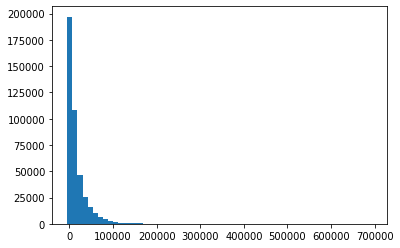

In [7]:
plt.hist(sales_and_features.Weekly_Sales, bins=60)

Upon initially attempting to do a log transformation, I encountered an issue where the sales data contained several zero values. Since at the moment, I'm just trying to see if a transformation will help normalize, I'll continue by plotting the values that weren't zero after a log10 transformation.

/home/steven/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/steven/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/steven/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.3000e+01, 0.0000e+00, 3.8000e+01, 1.3000e+01, 2.0000e+01,
        3.2000e+01, 3.3000e+01, 1.0800e+02, 1.0000e+01, 2.1000e+01,
        3.1000e+01, 3.0000e+01, 2.0000e+01, 1.0400e+02, 7.3000e+01,
        3.3300e+02, 1.9800e+02, 3.1600e+02, 5.7100e+02, 4.5500e+02,
        7.7500e+02, 1.0300e+03, 1.5120e+03, 1.6210e+03, 1.7790e+03,
        2.2440e+03, 2.5080e+03, 2.9760e+03, 3.2510e+03, 3.3120e+03,
        3.6120e+03, 3.8090e+03, 4.2560e+03, 4.7700e+03, 5.7030e+03,
        6.7720e+03, 7.7670e+03, 9.1940e+03, 1.0755e+04, 1.3157e+04,
        1.5976e+04, 1.9772e+04, 2.3783e+04, 2.7351e+04, 2.9084e+04,
        3.2166e+04, 3.2749e+04, 3.2718e+04, 2.9359e+04, 2.4898e+04,
        2.1990e+04, 1.7006e+04, 1.1347e+04, 5.4810e+03, 2.3070e+03,
        8.5900e+02, 8.1000e+01, 3.0000e+01, 9.0000e+00, 4.0000e+00]),
 array([-2.        , -1.86932008, -1.73864015, -1.60796023, -1.4772803 ,
        -1.34660038, -1.21592045, -1.08524053, -0.9545606 , -0.82388068,
        -0.69320075, -0.56252083, -0

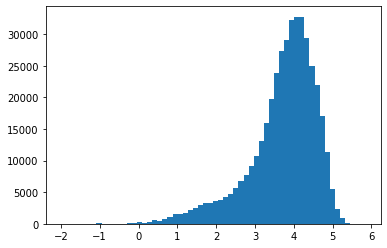

In [8]:
log_sales = np.log10(sales_and_features[sales_and_features.Weekly_Sales!=0].Weekly_Sales)
plt.hist(log_sales, bins=60)

Now, I want to take a look at the weeks that contained a zero for the sales value. A few look like they are probably just missing actual sales numbers or maybe there was a closure of some sort. Others seem to be missing a large amount of data. Moving forward, I'm comfortable dropping these values.

In [9]:
sales_and_features[sales_and_features.Weekly_Sales<=0]

,StoreStore,Dept,DateStore,Weekly_Sales,IsHolidayStore,StoreStore,DateStore,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHolidayStore
846,1,6,10/08/2012,-139.65,False,5.0,11/05/2012,73.45,3.688,4668.2,NaN,42.75,709.19,1740.42,222.313593,5.801,False
2384,1,18,04/05/2012,-1.27,False,14.0,11/06/2010,69.71,2.809,NaN,NaN,NaN,NaN,NaN,182.431557,8.899,False
6048,1,47,19/02/2010,-863.00,False,34.0,26/11/2010,41.13,2.752,NaN,NaN,NaN,NaN,NaN,126.669267,10.210,True
6049,1,47,12/03/2010,-698.00,False,34.0,03/12/2010,34.70,2.727,NaN,NaN,NaN,NaN,NaN,126.731333,10.210,False
6051,1,47,08/10/2010,-58.00,False,34.0,17/12/2010,42.64,2.884,NaN,NaN,NaN,NaN,NaN,126.879484,10.210,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,12/02/2010,-0.43,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419598,45,80,19/02/2010,-0.27,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419603,45,80,16/04/2010,-1.61,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419614,45,80,02/07/2010,-0.27,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


One of my initial concerns at the start of this project was that three of our features with the most predictive power were economic indicators. My concern was that these values would be too closely correlated to be used individually in a final model. Looking at the correlation matrix now, that concern appears unfounded. 

In [10]:
econ_indicators = features[['Fuel_Price','CPI','Unemployment']].dropna()
econ_indicators
econ_indicators.corr()

,Fuel_Price,CPI,Unemployment
Fuel_Price,1.000000,-0.186696,-0.03336
CPI,-0.186696,1.000000,-0.30311
Unemployment,-0.033360,-0.303110,1.00000


## Null Values
The features dataset contains numerous null values. Some are intentional, where markdown columns are null, for example, indicating no promotion going on. Others seem to be missing at random, such as fuel price, CPI or Unemployment data missing. To fill these in, I'll be using the mean value of these features for the same week.

In [ ]:
## Remove Null Values Here

# Significance of Correlations

In [11]:
sales_and_features.corr()

,StoreStore,Dept,Weekly_Sales,IsHolidayStore,StoreStore,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
StoreStore,1.000000,0.024004,-0.085195,-0.000548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dept,0.024004,1.000000,0.148032,0.000916,0.985191,-0.009403,0.068887,-0.150216,-0.048239,-0.036405,-0.010665,-0.020786,-0.178358,0.189606
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.214160,0.071040,-0.072805,-0.077966,-0.034262,-0.006674,-0.071196,-0.048280,0.134160,0.047309
IsHolidayStore,-0.000548,0.000916,0.012774,1.000000,0.000991,-0.009024,-0.005707,0.011830,0.012538,0.000801,0.010569,-0.003943,-0.008490,-0.001342
StoreStore,NaN,0.985191,-0.214160,0.000991,1.000000,-0.020566,0.066682,-0.136967,-0.044223,-0.033279,-0.005174,-0.011970,-0.209282,0.221153
Temperature,NaN,-0.009403,0.071040,-0.009024,-0.020566,1.000000,0.101354,-0.124979,-0.321888,-0.077552,-0.064194,-0.003241,0.164426,0.150890
Fuel_Price,NaN,0.068887,-0.072805,-0.005707,0.066682,0.101354,1.000000,0.066122,-0.193461,-0.057168,-0.008546,-0.021926,-0.186696,-0.033360
MarkDown1,NaN,-0.150216,-0.077966,0.011830,-0.136967,-0.124979,0.066122,1.000000,0.021289,-0.089841,0.810455,0.085967,-0.044327,0.020501
MarkDown2,NaN,-0.048239,-0.034262,0.012538,-0.044223,-0.321888,-0.193461,0.021289,1.000000,-0.053555,-0.046595,-0.008166,-0.044896,-0.001692
MarkDown3,NaN,-0.036405,-0.006674,0.000801,-0.033279,-0.077552,-0.057168,-0.089841,-0.053555,1.000000,-0.062785,-0.016026,-0.020166,-0.003464


Using a permutation test to analyze the p-value of each feature in comparison to Weekly Sales.

In [14]:
from mlxtend.evaluate import permutation_test
p_value = permutation_test(sales_and_features.CPI, sales_and_features.Weekly_Sales,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)

In [15]:
p_value

0.0

# Model Building